# Exploratory data analysis [EDA]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from project_lib.data_loaders import LoadData

## Data deatials

In [2]:
df = LoadData().get_data()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,1
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1,1,110.0,264.0,0,0,132.0,0,1.2,2,0,7,1
299,68.0,1,4,144.0,193.0,1,0,141.0,0,3.4,2,2,7,1
300,57.0,1,4,130.0,131.0,0,0,115.0,1,1.2,2,1,7,1
301,57.0,0,2,130.0,236.0,0,2,174.0,0,0.0,2,1,3,1


In [3]:
df.loc[:, df.dtypes == 'category'].nunique().sort_values()

sex        2
fbs        2
exang      2
target     2
restecg    3
slope      3
thal       3
cp         4
ca         4
dtype: int64

## Plots

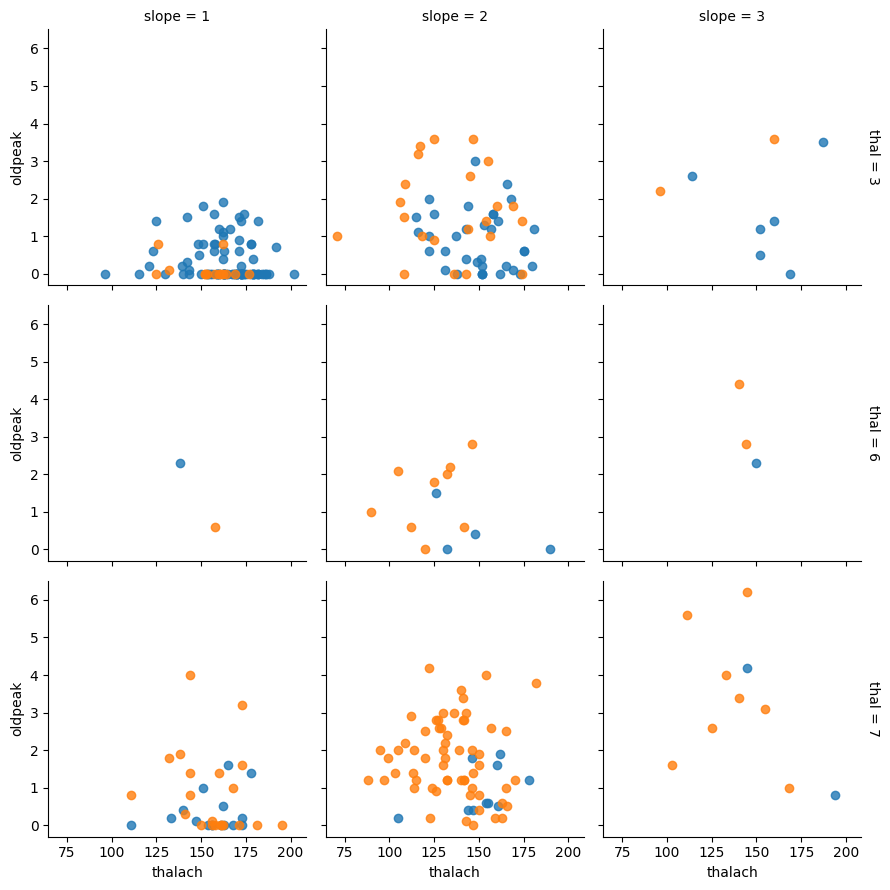

In [4]:
g = sns.FacetGrid(df, row="thal", col="slope", hue='target', margin_titles=True)
_ = g.map(sns.regplot, "thalach", "oldpeak", fit_reg=False)

According to above plots, `oldpeak`, `thalach` and `slope` are not proper features but `thal` may be a useful feature.

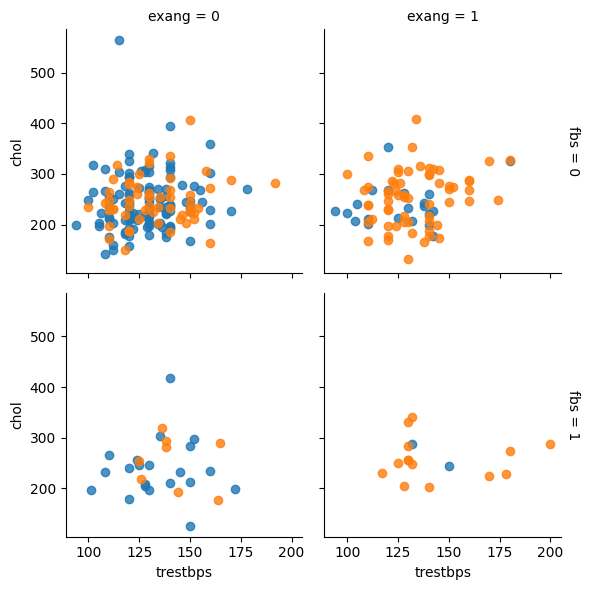

In [5]:
g = sns.FacetGrid(df, row="fbs", col="exang", hue='target', margin_titles=True)
_ = g.map(sns.regplot, "trestbps", "chol", fit_reg=False)

According to above plots, `fbs`, `chol` and `trestbps` are not proper features but `exang` may be a useful feature.

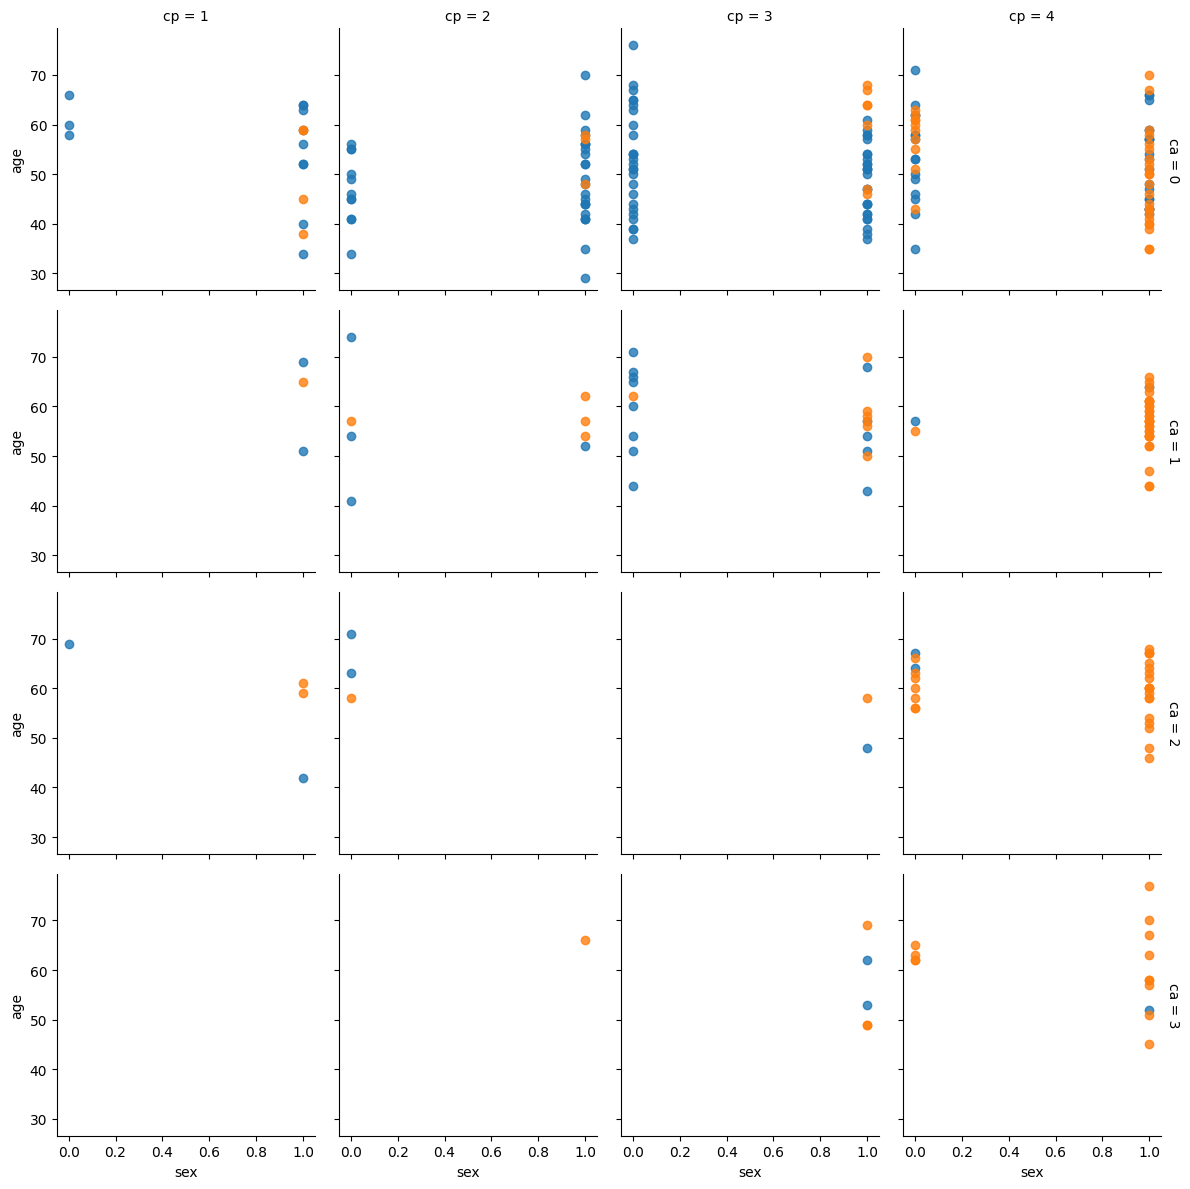

In [6]:
g = sns.FacetGrid(df, row="ca", col="cp", hue='target', margin_titles=True)
_ = g.map(sns.regplot, "sex", "age", fit_reg=False)

According to above plots, `age` is not a proper feature but `cp`, `ca`, and `sex` may be useful features.

## Summary
In the following, I will examine various models for a more detailed accuracy. Based on this simple survey that has been done. I take two ways. First, based on recognized important features, train some different models. In the next step, I do this with feature selection techniques.

For the next phase, I will do the same process using unsupervised techniques preprocessing.